# Analiza iger

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
igre = pd.read_csv("../zberi_podatke/csv_datoteke/igre.csv")

In [6]:
konzole = pd.read_csv("../zberi_podatke/csv_datoteke/konzole.csv").set_index('id_konzole')

In [4]:
igre

,id_igre,ime,konzola,ocena,tezavnost,dolzina,povezava
0,197771,The Legend of Zelda: Ocarina of Time,84,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time
1,641695,Persona 4 Golden,117,4.59,3.06,78.65,/vita/641695-persona-4-golden
2,950181,Chrono Trigger,108,4.58,2.97,44.30,/ds/950181-chrono-trigger
3,196885,Castlevania: Symphony of the Night,78,4.58,3.03,33.25,/ps/196885-castlevania-symphony-of-the-night
4,563538,Chrono Trigger,63,4.57,2.95,46.59,/snes/563538-chrono-trigger
...,...,...,...,...,...,...,...
8575,739988,Depression Quest,19,1.20,1.19,0.76,/pc/739988-depression-quest
8576,588576,Pit-Fighter,63,1.20,4.37,3.82,/snes/588576-pit-fighter
8577,974874,Hong Kong 97,63,1.17,4.32,24.01,/snes/974874-hong-kong-97
8578,563406,Dr. Jekyll and Mr. Hyde,41,1.13,4.69,10.14,/nes/563406-dr-jekyll-and-mr-hyde


In [5]:
konzole

,ime_konzole
id_konzole,
61,3DO
116,3DS
48,Acorn Archimedes
32,Adventurevision
122,Amazon Fire TV
...,...
111,Xbox 360
121,Xbox One
129,Xbox Series X


In [7]:
združena_razpredelnica = pd.merge(igre, konzole, left_on='konzola', right_on='id_konzole').drop('konzola', 1).set_index('id_igre')

In [7]:
združena_razpredelnica

,ime,ocena,tezavnost,dolzina,povezava,ime_konzole
id_igre,,,,,,
197771,The Legend of Zelda: Ocarina of Time,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time,Nintendo 64
197770,The Legend of Zelda: Majora's Mask,4.42,3.38,41.92,/n64/197770-the-legend-of-zelda-majoras-mask,Nintendo 64
198848,Super Mario 64,4.40,3.12,35.64,/n64/198848-super-mario-64,Nintendo 64
198849,Paper Mario,4.36,2.92,34.98,/n64/198849-paper-mario,Nintendo 64
196694,Banjo-Kazooie,4.33,3.07,31.38,/n64/196694-banjo-kazooie,Nintendo 64
...,...,...,...,...,...,...
584373,Star Wars Arcade,3.34,3.77,12.17,/sega32x/584373-star-wars-arcade,Sega 32X
916579,Super Mario Bros.: The Lost Levels,3.64,4.64,11.69,/famicomds/916579-super-mario-bros-the-lost-le...,Famicom Disk System
564210,Zelda: The Wand of Gamelon,2.50,3.72,15.73,/cdi/564210-zelda-the-wand-of-gamelon,CD-I


# Hipoteze

## 1. Ali imajo težje igre v povprečju nižjo oceno?

To lahko izvemo s tem, da narišemo graf ocen v odvisnosti od težavnosti:

In [8]:
po_tezavnosti = združena_razpredelnica.sort_values('tezavnost')

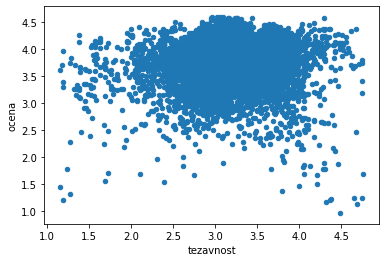

In [9]:
po_tezavnosti.plot.scatter(x='tezavnost', y='ocena')

Iz grafa je razvidno, da:

1. Večina iger ima ocena vsaj 2.5 in težavnost med 2.0 in 4.0

2. Če igra opazno odstopa od povprečne težavnosti (torej, če je izrazito nadpovprečno/podpovprečno težka), potem je večja verjetnost, da bo imela igra nižjo oceno (nižjo od recimo 2.5). To še posebej velja za nadpovprečno težke igre.

Slednja opazka je za nas zanimivejša. Bolje jo lahko ilustriramo, če vzamemo povprečno oceno za vsako težavnost:

In [9]:
po_tezavnosti_povprecje = združena_razpredelnica.groupby('tezavnost').mean()

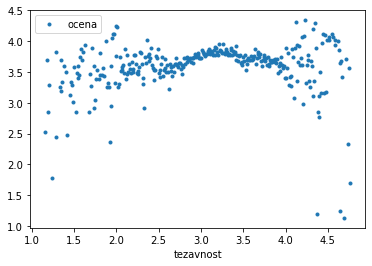

In [11]:
po_tezavnosti_povprecje.plot(style='.')

Opazimo lahko, da je za 'povprečne' težavnosti ocena dokaj nespremenljiva. To je zato, ker imamo pri povprečnih težavnostih večje število iger, torej večji nabor podatkov. Ko se premaknemo izven povprečja težavnosti, postanejo povprečja kaotična.

Toda ne le da dobivamo najnižja povprečja ocen 'na robovih' (tj. pri ekstremnih težavnostih), ampak tam dobivamo tudi najvišja povprečja, kar je posledica premajhnega nabora podatkov za tiste težavnosti. 

Odgovor na vprašanje, ali so težje igre v povprečju slabše ocenjene, ni tako izrazito pritrdilen, saj je veliko težkih iger zelo dobro ocenjenih. Po drugi strani pa vidimo, da je eden izmed razlogov za slabšo oceno lahko tudi previsoka težavnost.

Poskusimo še zaokrožiti težavnost, da morda dobimo bolj 'zvezne' rezultate:

In [10]:
def odstrani_drugo_decimalko(x): return ((x * 10) // 1) / 10

In [77]:
def zaokrožene_težavnosti(dataFrame):  # vrne nov dataFrame, ki ima težavnost posodobljeno s funkcijo 'odstrani_drugo_decimalko'
    dataFrame['tezavnost'] = odstrani_drugo_decimalko(dataFrame['tezavnost'])
    return dataFrame

In [12]:
zaokrožena_razpredelnica = zaokrožene_težavnosti(združena_razpredelnica)

In [13]:
po_tezavnosti_povprecje = zaokrožena_razpredelnica.groupby('tezavnost').mean()

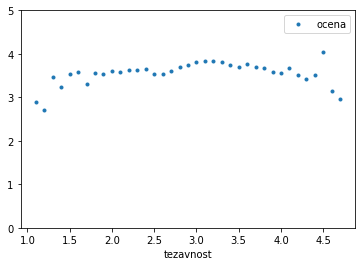

In [14]:
po_tezavnosti_povprecje.plot(style='.', ylim=(0,5))

Tukaj je malo bolj pregledno, da se tista 'zlata sredina' res nahaja nekje na sredi, okoli 3.0. Ponovno velja, da določena odstopanja pri visokih ali nizkih težavnostih ne pomenijo prav veliko. Vsekakor imajo težje igre manjše možnosti za dobro oceno, ampak se, kot smo na prejšnjem grafu videli, veliko iger ne drži tega pravila. 

Hipoteza je torej (le) deloma pravilna.

## 2. Ali so starejše igre v povprečju težje oz. imajo nižjo oceno?

Ker nimamo podatkov o datumih izidov posameznih iger, bomo uporabili podatke o 'življenskih ciklih' posameznih konzol oz. kdaj so posamezne konzole bile relevantne. Tako bomo lahko približno uvrstili posamezne igre na časovni trak. 

Uvozili bomo podatke o datumih, ko je določena konzola izšla, namreč ti dovolj dobro predstavljajo življenska obdobja konzol:

In [16]:
datumi = pd.read_csv("../zberi_podatke/csv_datoteke/datumi_konzol.csv").set_index('id_konzole')

Zdaj združimo razpredelnice, ki jih imamo:

In [17]:
vmesna_razpredelnica = pd.merge(igre, datumi, left_on='konzola', right_on='id_konzole').set_index('id_igre')

In [18]:
združena_razpredelnica_z_datumi = pd.merge(vmesna_razpredelnica, konzole, left_on='konzola', right_on='id_konzole').drop('konzola', 1)

In [46]:
združena_razpredelnica_z_datumi

,ime,ocena,tezavnost,dolzina,povezava,datum_konzole,ime_konzole
0,The Legend of Zelda: Ocarina of Time,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time,1996-06-23,Nintendo 64
1,The Legend of Zelda: Majora's Mask,4.42,3.38,41.92,/n64/197770-the-legend-of-zelda-majoras-mask,1996-06-23,Nintendo 64
2,Super Mario 64,4.40,3.12,35.64,/n64/198848-super-mario-64,1996-06-23,Nintendo 64
3,Paper Mario,4.36,2.92,34.98,/n64/198849-paper-mario,1996-06-23,Nintendo 64
4,Banjo-Kazooie,4.33,3.07,31.38,/n64/196694-banjo-kazooie,1996-06-23,Nintendo 64
...,...,...,...,...,...,...,...
8575,Star Wars Arcade,3.34,3.77,12.17,/sega32x/584373-star-wars-arcade,1994-11-21,Sega 32X
8576,Super Mario Bros.: The Lost Levels,3.64,4.64,11.69,/famicomds/916579-super-mario-bros-the-lost-le...,1986-02-21,Famicom Disk System
8577,Zelda: The Wand of Gamelon,2.50,3.72,15.73,/cdi/564210-zelda-the-wand-of-gamelon,1991-12-03,CD-I
8578,Link: The Faces of Evil,2.22,4.02,20.91,/cdi/564181-link-the-faces-of-evil,1991-12-03,CD-I


Izpustimo podatek za PC, saj so računalniške igre bile aktualne praktično skozi celotno zgodovino iger:

In [44]:
združena_razpredelnica_z_datumi_brez_PC = združena_razpredelnica_z_datumi[združena_razpredelnica_z_datumi.ime_konzole != 'PC']

In [45]:
združena_razpredelnica_z_datumi_brez_PC

,ime,ocena,tezavnost,dolzina,povezava,datum_konzole,ime_konzole
0,The Legend of Zelda: Ocarina of Time,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time,1996-06-23,Nintendo 64
1,The Legend of Zelda: Majora's Mask,4.42,3.38,41.92,/n64/197770-the-legend-of-zelda-majoras-mask,1996-06-23,Nintendo 64
2,Super Mario 64,4.40,3.12,35.64,/n64/198848-super-mario-64,1996-06-23,Nintendo 64
3,Paper Mario,4.36,2.92,34.98,/n64/198849-paper-mario,1996-06-23,Nintendo 64
4,Banjo-Kazooie,4.33,3.07,31.38,/n64/196694-banjo-kazooie,1996-06-23,Nintendo 64
...,...,...,...,...,...,...,...
8575,Star Wars Arcade,3.34,3.77,12.17,/sega32x/584373-star-wars-arcade,1994-11-21,Sega 32X
8576,Super Mario Bros.: The Lost Levels,3.64,4.64,11.69,/famicomds/916579-super-mario-bros-the-lost-le...,1986-02-21,Famicom Disk System
8577,Zelda: The Wand of Gamelon,2.50,3.72,15.73,/cdi/564210-zelda-the-wand-of-gamelon,1991-12-03,CD-I
8578,Link: The Faces of Evil,2.22,4.02,20.91,/cdi/564181-link-the-faces-of-evil,1991-12-03,CD-I


Zdaj igre združimo po konzolah in razvrstimo po datumih, ko so konzole izšle:

In [47]:
sortirana_razpredelnica = združena_razpredelnica_z_datumi_brez_PC.sort_values('datum_konzole')

In [48]:
razpredelnica_po_konzolah = sortirana_razpredelnica.groupby('ime_konzole', sort=False)  # 'sort=False' ohranja prejšnji vrstni red, v našem primeru časovni vrstni red konzol

In [ ]:
Najprej poglejmo ocene v odvisnosti od časa:

In [73]:
povprečja_po_konzolah = razpredelnica_po_konzolah.mean()

In [49]:
povprečja_po_konzolah

,ocena,tezavnost
ime_konzole,,
Atari 2600,3.466667,3.135926
Arcade Games,3.813143,3.397429
MSX,3.870000,3.510000
NES,3.259951,3.479531
Macintosh,4.056667,2.990000
Sega Master System,3.546333,3.470333
Famicom Disk System,3.640000,4.640000
Acorn Archimedes,4.170000,4.190000
TurboGrafx-16,3.690909,3.250909


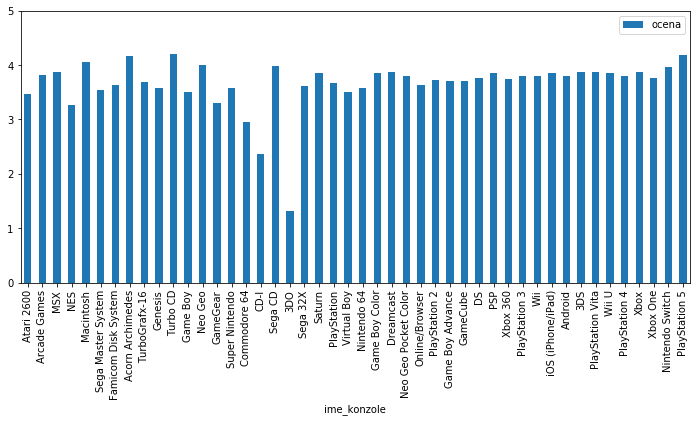

In [50]:
povprečja_po_konzolah.plot.bar(y='ocena', figsize=(12,5), ylim=(0,5))

Vidimo, da je v zadnjih dveh desetletjih ocena precej konstantna, razen na najnovejši konzoli, na kateri pa je zaenkrat še premalo iger (z dovolj glasovi, da bi se pojavile na našem seznamu), da bi lahko našli kakšne verodostojne ugotovitve. Na starejših konzolah so podatki malo bolj razpršeni, verjetno zato, ker je manj ljudi na spletni strani oddalo glas za starejše igre.

Na starejših konzolah so razlike bolj izrazite. Poglejmo zakaj:

In [51]:
razpredelnica_po_konzolah.size()

ime_konzole
Atari 2600               27
Arcade Games             70
MSX                       2
NES                     405
Macintosh                 3
Sega Master System       30
Famicom Disk System       1
Acorn Archimedes          1
TurboGrafx-16            11
Genesis                 212
Turbo CD                  3
Game Boy                 89
Neo Geo                  10
GameGear                 13
Super Nintendo          323
Commodore 64              2
CD-I                      2
Sega CD                  12
3DO                       1
Sega 32X                  5
Saturn                   44
PlayStation             402
Virtual Boy               2
Nintendo 64             156
Game Boy Color           45
Dreamcast                92
Neo Geo Pocket Color      3
Online/Browser           10
PlayStation 2           735
Game Boy Advance        194
GameCube                206
DS                      357
PSP                     302
Xbox 360                782
PlayStation 3           849
Wii     

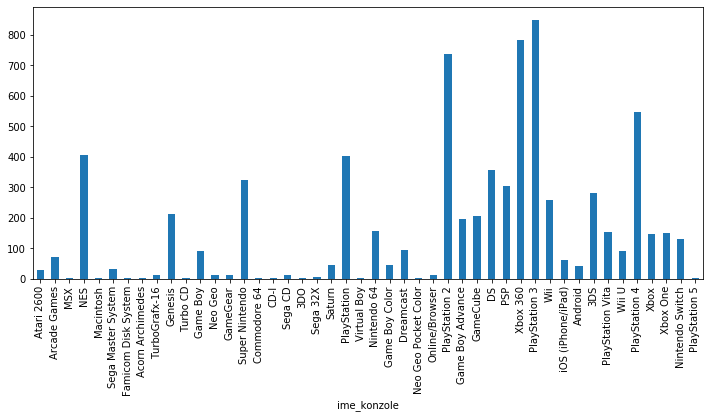

In [52]:
razpredelnica_po_konzolah.size().plot.bar(figsize=(12,5))

Vidimo, da imajo novejše konzole v povprečju veliko več iger na tem seznamu kot starejše. Tiste konzole, ki po povprečni oceni najbolj odstopajo, imajo ponavadi še najmanj iger, zato na podlagi njihovih podatkov ne moremo delati prave analize.

Poglejmo najbolj ekstremne primere: pozitivno odstopajo MSX, Macintosh, Acorn Archimedes, Turbo CD in Neo Geo, od teh imajo vsi kvečjemu 10 iger v bazi podatkov, zato te ocene nič ne pomenijo. Podobno negativno odstopajo Commodore 64, CD-I in 3DO, od teh imajo vsi le en ali dva vnosa.

Če teh ekstremnih primerov ne upoštevamo, vidimo, da so povprečne ocene starejših iger rahlo pod povprečnimi ocenami novejših iger.

Odstranimo zdaj konzole z malo igrami, recimo vse z manj kot 15 iger na seznamu:

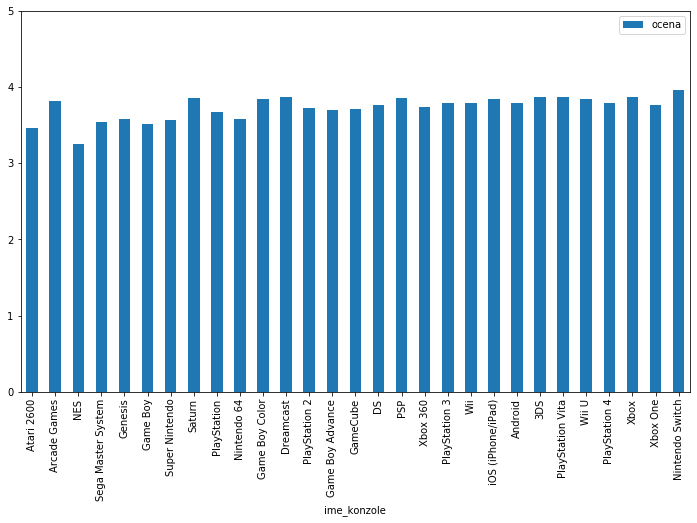

In [53]:
povprečja_po_konzolah[razpredelnica_po_konzolah.size() >= 15].plot.bar(y='ocena', figsize=(12,7), ylim=(0,5))

Povprečna ocena res malce narašča skozi čas. Morda obstaja kakšna zveza med oceno in težavnostjo iger, zato poglejmo še to:

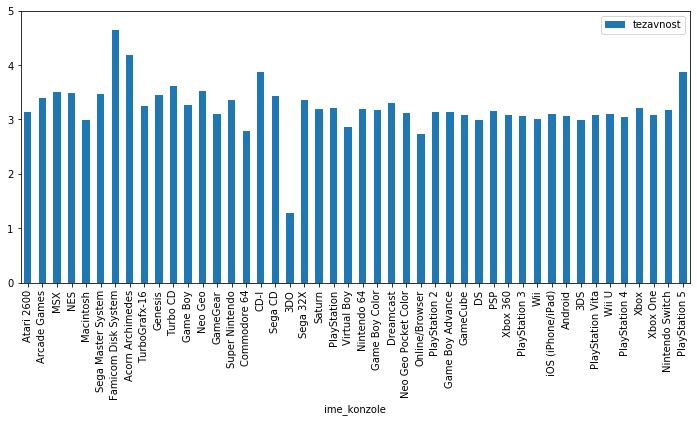

In [54]:
povprečja_po_konzolah.plot.bar(y='tezavnost', figsize=(12,5), ylim=(0,5))

In [ ]:
Kot prej bomo odstranili tiste z malo igrami:

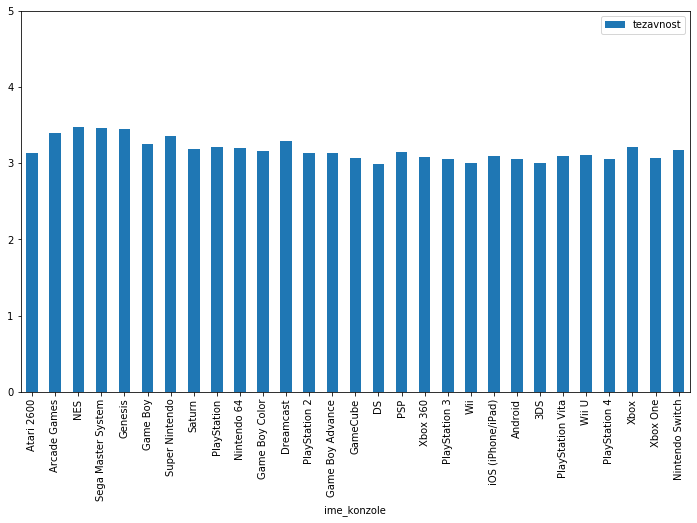

In [55]:
povprečja_po_konzolah[razpredelnica_po_konzolah.size() >= 15].plot.bar(y='tezavnost', figsize=(12,7), ylim=(0,5))

Vidimo, da krivulja tukaj malce pada med osemdesetimi in devetdesetimi leti prejšnjega stoletja, potem pa se bolj ali manj ustali. Zanimivo je, da so ravno tiste konzole, ki so bile slabše ocenjene, imele težje igre. Ponazorimo to še z dvojnim grafom:

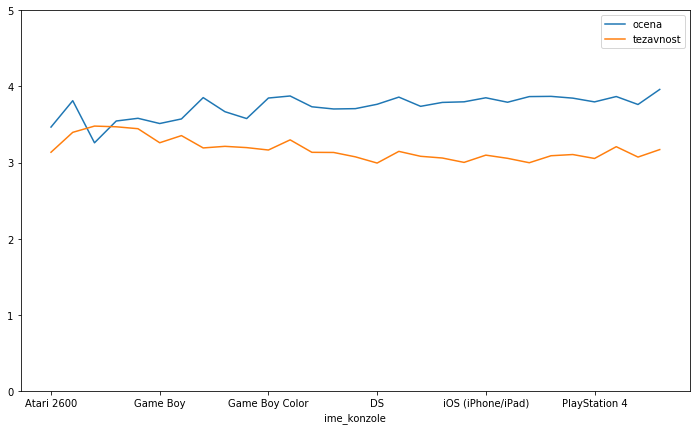

In [70]:
povprečja_po_konzolah[razpredelnica_po_konzolah.size() >= 15].plot(figsize=(12,7), ylim=(0,5))

Res vidimo, da razlika med oceno in težavnostjo skozi čas narašča. Hipoteza se je torej izkazala za pravilno.

Zakaj pa se ta razlika sploh veča? Verjetno zato, ker je včasih cilj proizvajalcev iger bil bolj 'zapakirati čim več igralnega časa v čim manj prostora', saj je prostora za posamezno igro bilo zelo malo. Zato so igre v splošnem bile težje in zato v povprečju tudi slabše ocenjene.

# 3. Ali imajo arkadne igre v povprečju višjo težavnost?

Pričakovali bi, da so arkadne igre narejene tako, da poberejo čim več denarja v igralnicah, zato so namerno zelo težke.

Še enkrat si poglejmo zgornji graf:

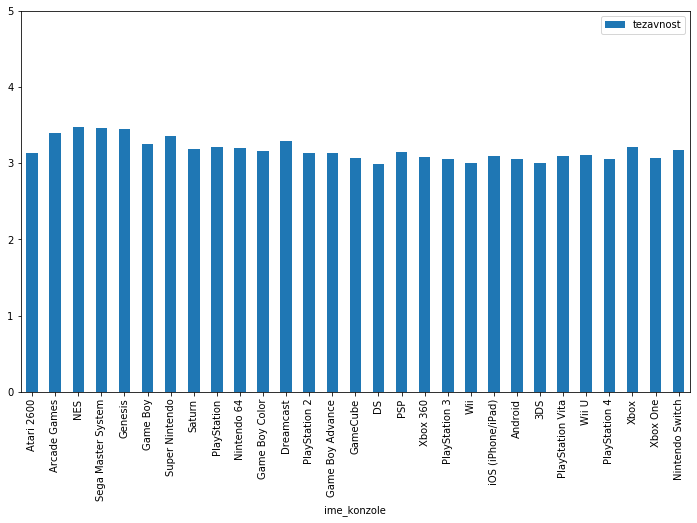

In [74]:
povprečja_po_konzolah[razpredelnica_po_konzolah.size() >= 15].plot.bar(y='tezavnost', figsize=(12,7), ylim=(0,5))

Še konkretne številke:

In [79]:
def zaokroži_na_dve_decimalki(x):
    return round(x, 2)

In [80]:
zaokroži_na_dve_decimalki(povprečja_po_konzolah[razpredelnica_po_konzolah.size() >= 15].tezavnost)

ime_konzole
Atari 2600            3.14
Arcade Games          3.40
NES                   3.48
Sega Master System    3.47
Genesis               3.45
Game Boy              3.26
Super Nintendo        3.35
Saturn                3.19
PlayStation           3.21
Nintendo 64           3.20
Game Boy Color        3.17
Dreamcast             3.30
PlayStation 2         3.13
Game Boy Advance      3.13
GameCube              3.08
DS                    2.99
PSP                   3.15
Xbox 360              3.08
PlayStation 3         3.06
Wii                   3.00
iOS (iPhone/iPad)     3.10
Android               3.06
3DS                   3.00
PlayStation Vita      3.09
Wii U                 3.11
PlayStation 4         3.05
Xbox                  3.21
Xbox One              3.07
Nintendo Switch       3.17
Name: tezavnost, dtype: float64

Medtem ko se večina konzol iz zadnjih dveh desetletij (spodnja polovica) giblje malce nad 3.0, imajo arkadne igre povprečno težavnost 3.40. Res je pa, da ima veliko konzol tistega časa podobno ali celo višjo povprečno težavnost. Arkadne igre zato niso nič lažje kot pa konzole tistega časa, so pa zagotovo težje kot pa današnje igre.

Zakaj pa so igre na konzolah kot so NES in Genesis tako težke, čeprav sploh delujejo na istem principu kot arkadne igre? Ena možnost je ta, da so arkadne igre bila v začetku osemdesetih praktično edina 'zvrst' iger, zato so prve igre na konzolah prevzele isto 'obliko'. Takrat so igre po večini ciljale na to, da je igralec čim bolj zafrustriran.

Torej ni presenetljivo, da so arkadne igre toliko težje od povprečja in da hipoteza drži.

# 4. Ali so računalniške igre v povprečju bolje ocenjene od tistih na konzolah ali telefonih?